In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import normalize
%matplotlib inline

In [2]:
videosArray = glob.glob("Videos/*.mp4")
videosScore = np.zeros_like(videosArray)
print(videosArray)

['Videos\\1.mp4', 'Videos\\2.mp4', 'Videos\\3.mp4', 'Videos\\4.mp4', 'Videos\\5.mp4', 'Videos\\high-score-cat.mp4', 'Videos\\low-score-cat.mp4', 'Videos\\medium-score-cat.mp4']


In [3]:
def calculateMovements(cap):
    videoLength = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    data = np.empty(videoLength)
    if cap.isOpened() == False:
        print("error, file not found")
        return 0
    ret, frame1 = cap.read()
    prvsImg = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    firstTime = True
    sumPrev = 0
    i = 0
    while True:
        sum = 0
        frameExists, frame2 = cap.read()
        if not frameExists:
            break
        nextImg = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prvsImg,nextImg, None, 0.5, 3, 15, 3, 5, 1.2, 0) #default recommended params
        mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1],angleInDegrees=True) #convert into polar form 
        mag_norm = np.nan_to_num(mag) #replace NaN's with 0's and inf with large numbers
        mag_norm = cv2.normalize(mag_norm,None,0,255,cv2.NORM_MINMAX) #normalize mag values between 0-255
        sum_mag = np.sum(mag_norm)
        sumMag = int(np.sum(mag_norm))
        if firstTime:
            firstTime = False
        else:
            diff = sumMag-sumPrev
            mov = abs(int(diff))
            data[i] = mov
        sumPrev = sumMag
        i += 1
    data_norm = normalizeArray(data)
    return data_norm

In [4]:
def normalizeArray(arr): 
    maxi = arr.max()
    for i in range(len(arr)):
        arr[i] = float(float(arr[i])/float(maxi))
    return arr
        

In [5]:
def plotMov(dist):
    positions = np.arange(len(dist))
    plt.bar(positions, dist, 1)
    plt.show()
# plt.hist(dist, bins=10)

In [6]:
def calculateScore(dist,alpha):
    return np.count_nonzero((dist > alpha))/dist.size



 plotting for Videos\1.mp4


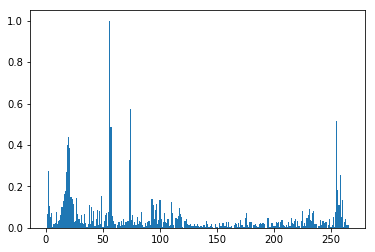


 plotting for Videos\2.mp4


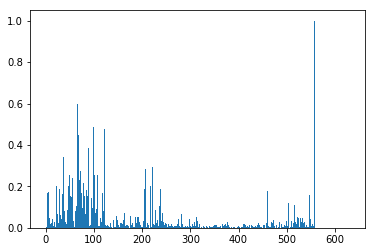


 plotting for Videos\3.mp4


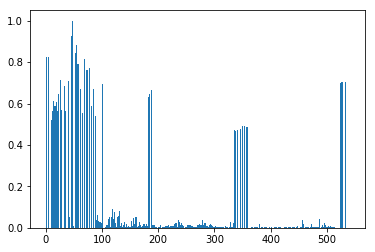


 plotting for Videos\4.mp4


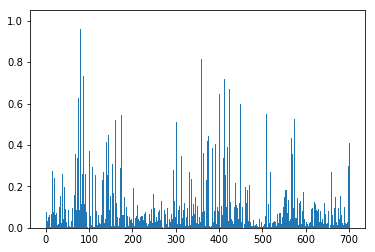


 plotting for Videos\5.mp4


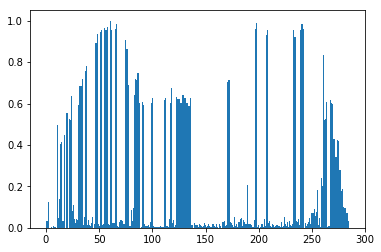


 plotting for Videos\high-score-cat.mp4


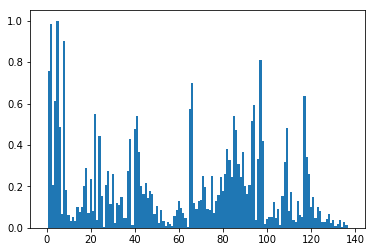


 plotting for Videos\low-score-cat.mp4


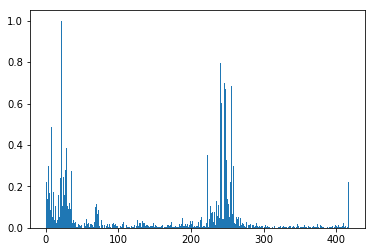


 plotting for Videos\medium-score-cat.mp4


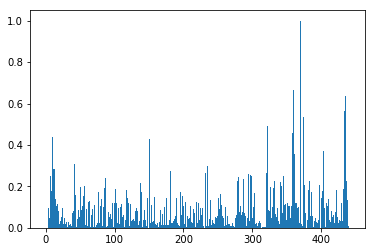

In [7]:
for i in range(len(videosArray)):
    #Read video
    cap = cv2.VideoCapture(videosArray[i]) #ment to quickly read videos, not to display it.     
    dist = calculateMovements(cap)
    print("\n plotting for "+ videosArray[i])
    plotMov(dist)
    score = calculateScore(dist,0.1)
    videosScore[i] = score

In [8]:
#Sort results
videosAndScore = dict(zip(videosArray,videosScore))
{k: v for k, v in sorted(videosAndScore.items(), key=lambda item: item[1],reverse=True)}

{'Videos\\high-score-cat.mp4': '0.5579710144927537',
 'Videos\\5.mp4': '0.3356643356643357',
 'Videos\\4.mp4': '0.3262108262108262',
 'Videos\\medium-score-cat.mp4': '0.31221719457013575',
 'Videos\\3.mp4': '0.15711645101663585',
 'Videos\\2.mp4': '0.12044374009508717',
 'Videos\\1.mp4': '0.11235955056179775',
 'Videos\\low-score-cat.mp4': '0.10739856801909307'}